Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import os
import distutils
import matplotlib.pyplot as plt
import sklearn

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop, Nadam

from sklearn.metrics import confusion_matrix

from tensorflow.keras.layers import *
from tensorflow.keras.activations import *


In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.5)

X = lfw_people.images
y = lfw_people.target
n_classes = lfw_people.target_names.shape[0]
print(n_classes)
height, width =  X.shape[1:]


# split into a training and testing set
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

x_train = np.float32(np.expand_dims(x_train, -1)/255)
x_test = np.float32(np.expand_dims(x_test, -1)/255)

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
print(np.amin(x_train),np.amax(x_train))


62
(2267, 62, 47) (756, 62, 47) (2267,) (756,)
(2267, 62, 47, 1) (756, 62, 47, 1) (2267, 62) (756, 62)
0.0 1.0


In [3]:
r = np.random.randint(0,X_train.shape[0],size=10)
for i in r:
  plt.figure()
  plt.imshow(X_train[i],cmap='gray')

NameError: ignored

In [4]:
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))
print(x_train.shape)

def dense_model(input_shape=(2914,)):
  model = tf.keras.models.Sequential()
  model.add(Dense(1000, input_shape=input_shape, activation='relu'))
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(62, activation='softmax'))
  return model

(2267, 2914)


In [6]:
model = dense_model()
model.summary()
opt = Adam(learning_rate= 0.001)#RMSprop(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               1457500   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 62)                31062     
Total params: 1,739,062
Trainable params: 1,739,062
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(
    x_train, y_train,
    epochs =  20, 
    validation_data=(x_test, y_test),
    batch_size=528, 
    verbose = 1,
)
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

Epoch 1/20
5/5 [==============================] - 3s 56ms/step - loss: 5.0782 - accuracy: 0.0645 - val_loss: 3.8843 - val_accuracy: 0.0966
Epoch 2/20
5/5 [==============================] - 0s 16ms/step - loss: 3.8702 - accuracy: 0.1327 - val_loss: 3.8269 - val_accuracy: 0.0489
Epoch 3/20
5/5 [==============================] - 0s 16ms/step - loss: 3.7410 - accuracy: 0.1266 - val_loss: 3.7355 - val_accuracy: 0.1627
Epoch 4/20
5/5 [==============================] - 0s 17ms/step - loss: 3.6575 - accuracy: 0.1792 - val_loss: 3.7049 - val_accuracy: 0.1627
Epoch 5/20
5/5 [==============================] - 0s 17ms/step - loss: 3.6239 - accuracy: 0.1808 - val_loss: 3.6613 - val_accuracy: 0.1627
Epoch 6/20
5/5 [==============================] - 0s 16ms/step - loss: 3.5990 - accuracy: 0.1828 - val_loss: 3.6444 - val_accuracy: 0.1627
Epoch 7/20
5/5 [==============================] - 0s 16ms/step - loss: 3.5468 - accuracy: 0.1811 - val_loss: 3.5985 - val_accuracy: 0.1653
Epoch 8/20
5/5 [===========

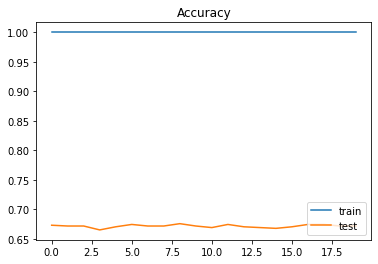

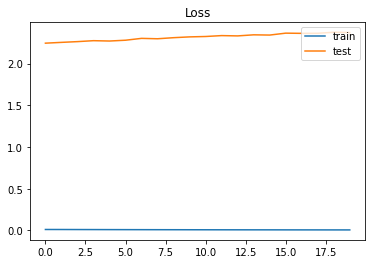

In [ ]:
fig, ax = plt.subplots()
ax.plot(accuracy,label = 'train')
ax.plot(val_accuracy,label = 'test')
ax.set_title('Accuracy')
ax.legend(loc='lower right')
fig, ax = plt.subplots()
ax.plot(loss,label = 'train')
ax.plot(val_loss,label = 'test')
ax.set_title('Loss')
ax.legend(loc='upper right')